<a href="https://colab.research.google.com/github/DeisyData/BIT_IA_Bootcamp/blob/main/S12_C3_CNN_Binary_clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CNN

[CNN](https://poloclub.github.io/cnn-explainer/)

In [1]:
import os
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Parte 1. Cargar los datos

In [2]:
if(os.path.exists("pizza_steak")):
  print("Files already exist")
else:
  !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

  zip_ref = zipfile.ZipFile("pizza_steak.zip","r")
  zip_ref.extractall()
  zip_ref.close()
  !rm pizza_steak.zip

--2024-12-18 23:18:06--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.207, 173.194.203.207, 74.125.199.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  91.1MB/s    in 1.1s    

2024-12-18 23:18:07 (91.1 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
!ls pizza_steak/

test  train


# Parte 2. Inspeccionar los datos

In [4]:
!pip install utils

  Preparing metadata (setup.py) ... done
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13906 sha256=f1de51214c3657709f09eacb655cf20c825aed51bf2ebc9425291c468871f25c
  Stored in directory: /root/.cache/pip/wheels/b8/39/f5/9d0ca31dba85773ececf0a7f5469f18810e1c8a8ed9da28ca7
Successfully built utils


In [5]:
import pathlib
import numpy as np
import random

from utils import *

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [6]:
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [7]:
data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [8]:
def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape: {img.shape}")
  return img

Image shape: (512, 512, 3)


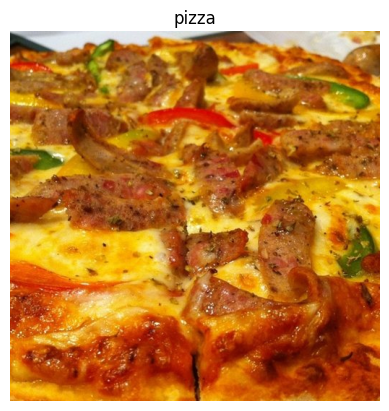

In [9]:
random_class = random.choice(class_names)
img = view_random_image(target_dir = "pizza_steak/train/", target_class=random_class)

In [10]:
# Results Dictionary
all_results = {
    "models" : ["model_1", "model_2", "model_3", "model_4"],
    "acc" : [],
    "loss" : [],
}

# Parte 3. Preprocesamiento

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [105]:
train_generator = ImageDataGenerator(rescale=1/255., validation_split=0.2)
test_generator = ImageDataGenerator(rescale=1/255.)

In [106]:
train_data = train_generator.flow_from_directory(
    directory = train_dir, # Directorio de los datos de entrenamiento
    target_size = (224,224), # Tamaño de las imagenes cuadradas para poder usar Conv2D
    class_mode = "binary", # Clases binarias
    seed = 42, # Semilla que asegura la reproducibilidad
    batch_size = 32, # Tamaño del batch
    subset = "training" # Subconjunto de entrenamiento
)

valid_data = train_generator.flow_from_directory(
    directory = train_dir, # Directorio de los datos de entrenamiento
    target_size = (224,224), # Tamaño de las imagenes
    class_mode = "binary", # Clases binarias
    batch_size = 32, # Tamaño del batch
    seed = 42, # Semilla
    shuffle = False, #
    subset = "validation" # Subconjunto de validación
)

test_data = train_generator.flow_from_directory(
    directory = test_dir, # Directorio de los datos de entrenamiento
    target_size = (224,224), # Tamaño de las imagenes
    class_mode = "binary", # Clases binarias
    seed = 42, # Semilla
    batch_size = 32, # Tamaño del batch
    shuffle = False
)

Found 1200 images belonging to 2 classes.
Found 300 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [85]:
images, labels = next(train_data)

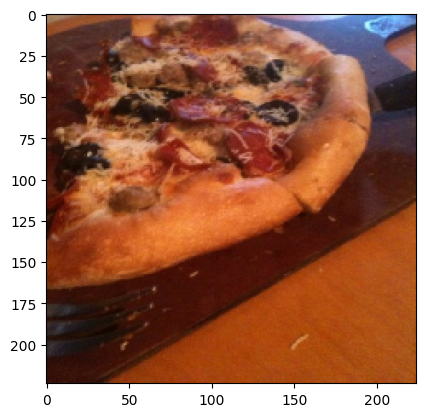

In [86]:
images[20].shape
plt.imshow(images[20])

# Parte 4.A. Crear el modelo 1

In [87]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [88]:
model_1 = Sequential([Conv2D(filters=10, kernel_size=3, input_shape=(224,224,3), padding = 'valid', activation="relu"),
                      Conv2D(filters=10, kernel_size=3,  activation="relu"),
                      Conv2D(filters=10, kernel_size=3,  activation="relu"),
                      Conv2D(filters=10, kernel_size=3,  activation="relu"),
                      Flatten(),
                      Dense(units=1, activation="sigmoid")])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [89]:
model_1.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 218, 218, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 216, 216, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 466560)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │         466,561 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 469,571 (1.79 MB)

 Trainable params: 469,571 (1.79 MB)

 Non-trainable params: 0 (0.00 B)

In [90]:
model_1.compile(loss="binary_crossentropy", optimizer=Adam(), metrics=["accuracy"])

# Parte 4.B. Entrenar el modelo 1

In [91]:
import numpy as np

In [92]:
batch_size = 32
history_1 = model_1.fit(train_data,
                        epochs=6,
                        #steps_per_epoch=np.floor(len(train_data)//batch_size),  #floor(len(X_train)//batch_size)
                        validation_data=valid_data,
                        #validation_steps=np.floor(len(valid_data)//batch_size),
                        verbose = 1)

Epoch 1/6


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 140ms/step - accuracy: 0.5625 - loss: 3.2050 - val_accuracy: 0.6167 - val_loss: 0.6599
Epoch 2/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step - accuracy: 0.7314 - loss: 0.5422 - val_accuracy: 0.7333 - val_loss: 0.5533
Epoch 3/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.8021 - loss: 0.4708 - val_accuracy: 0.7433 - val_loss: 0.5286
Epoch 4/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.8721 - loss: 0.3570 - val_accuracy: 0.7100 - val_loss: 0.5741
Epoch 5/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - accuracy: 0.9349 - loss: 0.2020 - val_accuracy: 0.7567 - val_loss: 0.5884
Epoch 6/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - accuracy: 0.9768 - loss: 0.0867 - val_accuracy: 0.7133 - val_loss: 0.8888


In [93]:
1200/32 # El número de lotes

37.5

# Parte 4.C. Probar el modelo 1

In [94]:
scores_1  = model_1.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - accuracy: 0.8316 - loss: 0.4044


In [95]:
def plot_train_curves(history):
  plt.figure(figsize=(12,2))
  plt.subplot(1,2,1)
  plt.plot(history.history["accuracy"], label = "accuracy")
  plt.plot(history.history["val_accuracy"], label = "val_accuracy")
  plt.title("Training and Validation Accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.show()


  plt.figure(figsize=(12,2))
  plt.subplot(1,2,1)
  plt.plot(history.history["loss"], label = "loss")
  plt.plot(history.history["val_loss"], label = "val_loss")
  plt.title("Training and Validation Loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

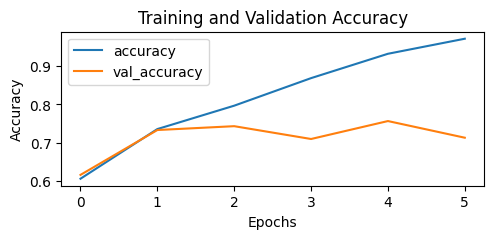

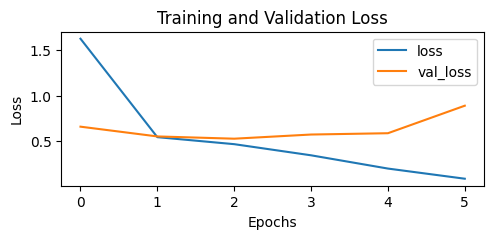

In [96]:
plot_train_curves(history_1)

* El rendimiento del entrenamiento es excelente es casi un accuracy de 100%
* El rendimiento del validacion es muy baja  al final es del 70%

Esto muestra que el modelo se sobreajustó (overfiting)

**Qué hacer para disminuir el sobreajuste**
* Aumentar los datos
* Regularización (pooling, dropout,)
* Disminuir la complejidad ( este caso tiene 4 capas convolucionaes secuencciales)


# Parte 5.A. Crear el modelo 2

In [97]:
model_2 = Sequential([Conv2D(filters=10, kernel_size=3, input_shape=(224,224,3), padding = 'valid', activation="relu"),
                      MaxPool2D(pool_size=2),
                      Conv2D(filters=10, kernel_size=3,  activation="relu"),
                      MaxPool2D(),
                      Conv2D(filters=10, kernel_size=3,  activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(units=1, activation="sigmoid")])

model_2.compile(loss="binary_crossentropy", optimizer=Adam(), metrics=["accuracy"])

# Parte 5.B. Entrenar el modelo 2

In [98]:
batch_size = 32
history_2 = model_2.fit(train_data,
                        epochs=6,
                        validation_data=valid_data,
                        verbose = 1)

Epoch 1/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 122ms/step - accuracy: 0.6782 - loss: 0.6150 - val_accuracy: 0.7567 - val_loss: 0.5391
Epoch 2/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.7728 - loss: 0.4920 - val_accuracy: 0.7367 - val_loss: 0.5236
Epoch 3/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.7942 - loss: 0.4476 - val_accuracy: 0.7867 - val_loss: 0.4818
Epoch 4/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.8174 - loss: 0.4015 - val_accuracy: 0.7800 - val_loss: 0.4884
Epoch 5/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.8382 - loss: 0.3957 - val_accuracy: 0.7367 - val_loss: 0.5676
Epoch 6/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.8301 - loss: 0.3623 - val_accuracy: 0.7400 - val_loss: 0.5653


# Parte 5.C. Probar el modelo 2

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.8929 - loss: 0.2705


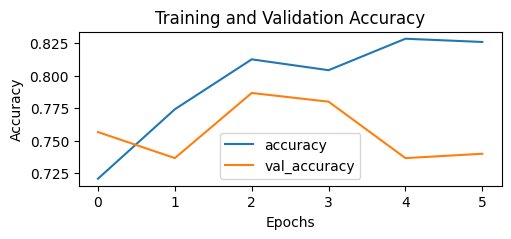

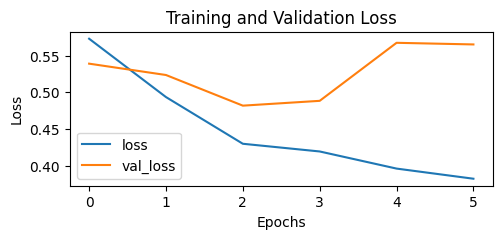

In [99]:
scores_2  = model_2.evaluate(test_data)
plot_train_curves(history_2)

#Reducir el sobreajuste con Data Augmentation

Data augmentation: es una técnica que aumenta el número de ejemplos de entrenamiento:

* Rotar la imagen
* Inclinar la imagen
* Zoom
* Desplazar horizontal
* Desplazar vertical
* Voltear
* Rellenar pixeles vacios

# Parte 3.B. Preprocesamiento con Data Augmentation


In [139]:
# Generar imagenes aunmentadas
train_datagen_augmented = ImageDataGenerator(
    rescale = 1/255.,
    rotation_range = 0.2, # Rotar la imagen con un rango de 20%
    shear_range = 0.2, # Inclinación de la imagen
    zoom_range = 0.2, # Zoom
    width_shift_range = 0.2, # Desplazamiento horizontal
    height_shift_range = 0.2, # Desplazamiento vertical
    horizontal_flip = True, # Voltear horizontalmente
    fill_mode = "reflect", # Rellenar pixeles vacios
    validation_split = 0.2
)

# Generar imagener sin aumentar
train_datagen = ImageDataGenerator(rescale=1/255., validation_split=0.2)


In [140]:
# Importar los datos y aplicar el ImageDataGenerator

train_data_augmented  = train_datagen_augmented.flow_from_directory(
    directory = train_dir, # Directorio de los datos de entrenamiento
    target_size = (224,224), # Tamaño de las imagenes cuadradas para poder usar Conv2D
    class_mode = "binary", # Clases binarias
    seed = 42, # Semilla que asegura la reproducibilidad
    batch_size = 32, # Tamaño del batch
    subset = "training" # Subconjunto de entrenamiento
)

train_data_2 = train_datagen.flow_from_directory(
    directory = train_dir, # Directorio de los datos de entrenamiento
    target_size = (224,224), # Tamaño de las imagenes cuadradas para poder usar Conv2D
    class_mode = "binary", # Clases binarias
    seed = 42, # Semilla que asegura la reproducibilidad
    batch_size = 32, # Tamaño del batch
    subset = "training" # Subconjunto de entrenamiento
)


Found 1200 images belonging to 2 classes.
Found 1200 images belonging to 2 classes.


In [141]:
images, labels = next(train_data_2)
images_aug, labels_aug = next(train_data_augmented)

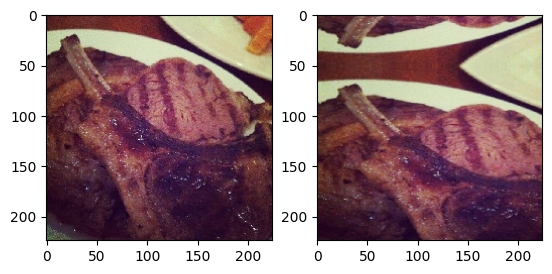

In [142]:
import random

random_img = random.randint(0,31)
plt.subplot(1,2,1)
plt.imshow(images[random_img])
plt.subplot(1,2,2)
plt.imshow(images_aug[random_img])

In [143]:
valid_data_augmented  = train_datagen_augmented.flow_from_directory(
    directory = train_dir, # Directorio de los datos de entrenamiento
    target_size = (224,224), # Tamaño de las imagenes
    class_mode = "binary", # Clases binarias
    batch_size = 32, # Tamaño del batch
    seed = 42, # Semilla
    shuffle = False, #
    subset = "validation" # Subconjunto de validación
)

Found 300 images belonging to 2 classes.


# Parte 6.A. Crear Modelo 3 ( el mismos modle_2)
# Parte 6.B. Entrenar el model_3


In [144]:
model_3 = Sequential([Conv2D(filters=10, kernel_size=3, input_shape=(224,224,3), padding = 'valid', activation="relu"),
                      MaxPool2D(pool_size=2),
                      Conv2D(filters=10, kernel_size=3,  activation="relu"),
                      MaxPool2D(),
                      Conv2D(filters=10, kernel_size=3,  activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(units=1, activation="sigmoid")])

model_3.compile(loss="binary_crossentropy", optimizer=Adam(), metrics=["accuracy"])

batch_size = 32
history_3 = model_3.fit(train_datagen_augmented,
                        epochs=6,
                        validation_data=valid_data,
                        verbose = 1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Unrecognized data type: x=<keras.src.legacy.preprocessing.image.ImageDataGenerator object at 0x7c35339cb160> (of type <class 'keras.src.legacy.preprocessing.image.ImageDataGenerator'>)

# Parte 6.C. Probar el modelo 3

In [ ]:
scores_3  = model_3.evaluate(test_data)
plot_train_curves(history_2)